# Notebook Containing the data generation, NN Modelling and Optimization Attempts for two windturbines

In [7]:
### Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from pyomo import environ
from pyomo.core import *
import pyomo.environ as pyo
import gurobipy

import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), 'DistCL_code'))
from distcl import distcl

## Load Data

In [8]:
# Load Data
data = pd.read_csv("data/two_turbine_deterministic270.csv")
data.head()

,x_turb2,y_turb2,wind_speed,wind_direction,turbulence_intensity,turbine1_power,turbine2_powers,farm_power
0,0.0,0.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
1,0.0,50.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
2,0.0,100.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
3,0.0,150.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
4,0.0,200.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918


# Train NN and generate constraints

In [9]:
# Test/Train Split
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

val_ind = val_data.index
test_ind = test_data.index

In [10]:
# Retrain the model with the best parameters
cl_tool = distcl(X=data[["x_turb2", "y_turb2", "wind_speed", "wind_direction"]],#, "turbulence_intensity"]],
            y=data["farm_power"], n_preds=1, val_ind=val_ind, test_ind=test_ind)

model, preds_test, sd_test, y_test = cl_tool.train(n_hidden=2, n_nodes=10, iters=500, drop=0.05, learning_rate=1e-4)

DistFCNN(
  (lin_layers): ModuleList(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
  (output_mean_layer): Linear(in_features=10, out_features=1, bias=True)
  (output_sd_layer): Linear(in_features=10, out_features=1, bias=True)
  (droput_layers): ModuleList(
    (0-1): 2 x Dropout(p=0.05, inplace=False)
  )
)
cpu
epoch 0 loss 353701.625
NN fitting process finished with a validation GAUSSIANNLL loss of 33.33909606933594 in epoch 499


In [11]:
cons = cl_tool.constraint_build(model)
cons.to_csv('inputs/constraints_twoturbines.csv')
cons = pd.read_csv('inputs/constraints_twoturbines.csv', index_col=0)
cons

,intercept,layer,node,node_0,node_1,node_2,node_3,node_4,node_5,node_6,node_7,node_8,node_9
0,0.048729,0,0,-0.003743,0.268222,-0.425384,-0.388411,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.267835,0,1,-0.192577,0.134079,0.022529,0.385071,NaN,NaN,NaN,NaN,NaN,NaN
2,0.096288,0,2,-0.044372,0.132306,-0.155889,-0.107599,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.466847,0,3,-0.477674,-0.331141,-0.206112,0.018522,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.375492,0,4,0.197668,0.300011,-0.326168,-0.204369,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.142547,0,5,0.181609,0.415194,-0.103856,0.474380,NaN,NaN,NaN,NaN,NaN,NaN
6,0.343764,0,6,-0.080592,0.052907,0.436340,-0.488354,NaN,NaN,NaN,NaN,NaN,NaN
7,0.319975,0,7,-0.314769,-0.126583,-0.204363,0.431594,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.239514,0,8,-0.324090,-0.230166,-0.341047,-0.451913,NaN,NaN,NaN,NaN,NaN,NaN
9,0.001185,0,9,-0.291870,0.429799,0.205053,0.230590,NaN,NaN,NaN,NaN,NaN,NaN


# Optimization Model



### Decision Variables
\( x \): x-coordinate of the second turbine relative to the first.
\( y \): y-coordinate of the second turbine relative to the first.

### **Objective Function**
$$ \max_{x, y} P(x, y) $$

### Constraints
$ x_{\min} \leq x \leq x_{\max} $
   
$ y_{\min} \leq y \leq y_{\max} $


In [14]:
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory, minimize, value

### Define the optimization model
model = ConcreteModel()

contextual_sample = data[["x_turb2", "y_turb2", "wind_speed", "wind_direction"]].iloc[[0]]
model.var_ind = pyo.Set(initialize=contextual_sample.columns.sort_values())

model.x = pyo.Var(model.var_ind, within=pyo.Reals)
model.y = pyo.Var(pyo.Any, dense=False, domain=pyo.Reals) # learned variables (demand)

model.power = pyo.Var(within=pyo.Reals) # saving power per scenario


# obj function 
def obj_expression(model):
    return model.power
model.OBJ = pyo.Objective(rule=obj_expression, sense=pyo.maximize)

#power generation
def power(model):
    return model.power == model.y['power', 1, 'mean']
model.const_power = pyo.Constraint(rule=power)

#constraint for fixing contextual information
def fix_vars(model,x_ind):
    if x_ind=='x_turb2':
        return pyo.Constraint.Skip
    if x_ind=='y_turb2':
        return pyo.Constraint.Skip
    else:
        return model.x[x_ind] == contextual_sample.loc[0,x_ind]
model.const_fix_vars = pyo.Constraint(model.var_ind, rule=fix_vars)

# upper limits for x_turb2 and y_turb2
model.x_turb2_ub = pyo.Constraint(expr=model.x['x_turb2'] <= 5000)  # Upper bound
model.y_turb2_ub = pyo.Constraint(expr=model.x['y_turb2'] <= 600)   # Upper bound

# lower limits for x_turb2 and y_turb2
def distance_constraint(model):
    return ((model.x["x_turb2"] - 0)**2 + (model.x["y_turb2"] - 0)**2) >= 100**2 
model.distance_constraint = Constraint(rule=distance_constraint)

### Constraint Embedding
cl_tool.const_embed(opt_model=model, constaints=cons, outcome='power', deterministic = True)


1
Index(['wind_direction', 'wind_speed', 'x_turb2', 'y_turb2'], dtype='object')


In [16]:

# Solve the optimization problem
solver = SolverFactory('gurobi')
solver.options['threads'] = 8
solver.options['NonConvex'] = 2
results = solver.solve(model, tee=True)

Read LP format model from file /var/folders/2j/t8d8dcsn1tg5sc8l4kz4_4ch0000gn/T/tmpn3uddayt.pyomo.lp
Reading time = 0.00 seconds
x1: 68 rows, 49 columns, 410 nonzeros
Set parameter Threads to value 8
Set parameter NonConvex to value 2
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[x86] - Darwin 24.4.0 24E263)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 8 threads

Non-default parameters:
NonConvex  2
Threads  8

Optimize a model with 68 rows, 49 columns and 410 nonzeros
Model fingerprint: 0x27d58e44
Model has 1 quadratic constraint
Variable types: 29 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [2e-05, 1e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e-03, 5e+03]
  QRHS range       [1e+04, 1e+04]
Presolve removed 8 rows and 7 columns
Presolve time: 0.00s
Presolved: 63 rows, 45 columns, 353 n

In [17]:
model.pprint()

1 Set Declarations
    var_ind : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {'wind_direction', 'wind_speed', 'x_turb2', 'y_turb2'}

5 Var Declarations
    power : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 0.2678892739140377 :  None : False : False :  Reals
    v : Size=20, Index=Any
        Key                : Lower : Value               : Upper : Fixed : Stale : Domain
        ('power', 0, 0, 1) :     0 :                 0.0 :  None : False : False : NonNegativeReals
        ('power', 0, 1, 1) :     0 : 0.13354316037920166 :  None : False : False : NonNegativeReals
        ('power', 0, 2, 1) :     0 :                 0.0 :  None : False : False : NonNegativeReals
        ('power', 0, 3, 1) :     0 :                 0.0 :  None : False : False : NonNegativeReals
        ('power', 0, 4, 1) :     0 :                 0.0 :  None : Fal

In [18]:
# print optimization results
print("\nOptimization Results:")

# Print x variables (contextual features and decision variables)
print("\nContextual/Decision Variables (x):")
for k in model.x:
    print(f"{k}: {pyo.value(model.x[k])}")



Optimization Results:

Contextual/Decision Variables (x):
wind_direction: 270.0
wind_speed: 8.0
x_turb2: 2332.1277663899964
y_turb2: 452.60665760001564


In [24]:
data

,x_turb2,y_turb2,wind_speed,wind_direction,turbulence_intensity,turbine1_power,turbine2_powers,farm_power
0,0.0,0.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
1,0.0,50.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
2,0.0,100.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
3,0.0,150.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
4,0.0,200.0,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
...,...,...,...,...,...,...,...,...
1195,4950.0,350.0,8.0,270.0,0.06,1753.954459,1738.243392,3492.197852
1196,4950.0,400.0,8.0,270.0,0.06,1753.954459,1746.138273,3500.092732
1197,4950.0,450.0,8.0,270.0,0.06,1753.954459,1750.412356,3504.366815
1198,4950.0,500.0,8.0,270.0,0.06,1753.954459,1752.492363,3506.446822


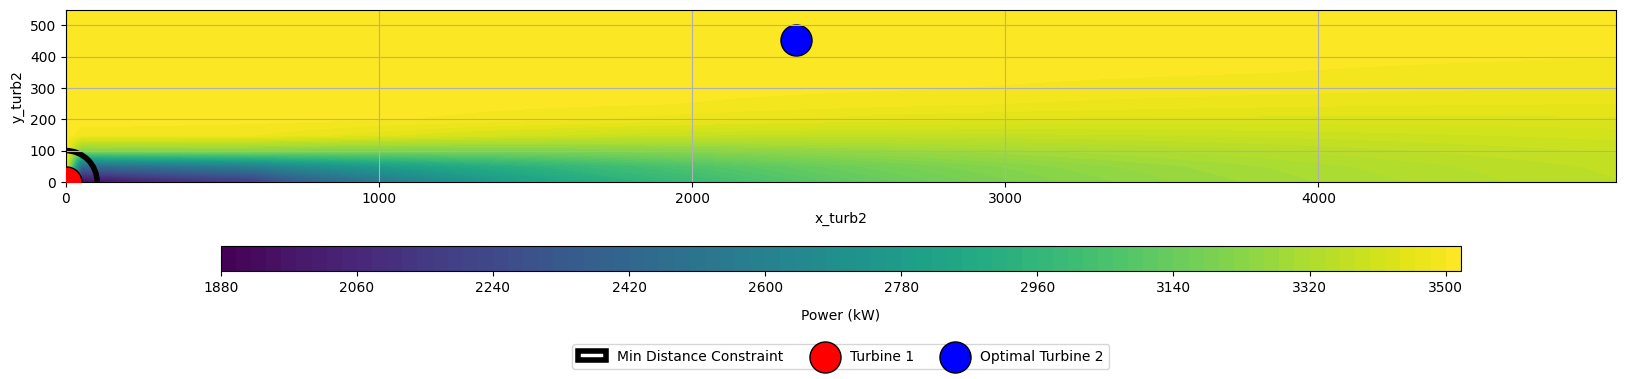

In [25]:
# Visualize the results
from scipy.interpolate import griddata


# Colormap with interpolation
x = data['x_turb2']
y = data['y_turb2']
z = data['farm_power']
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='linear')

plt.figure(figsize=(20, 6))
plt.contourf(xi, yi, zi, levels=100, cmap='viridis')
cbar = plt.colorbar(label='Total Farm Power', orientation='horizontal', pad=-0.2, aspect=50, shrink=0.8)
cbar.ax.set_xlabel('Power (kW)', labelpad=10)

# Plot minimum distance constraint
circle = plt.Circle((0, 0), 100, color='black', fill=False, linestyle='-', label='Min Distance Constraint', linewidth=4)
plt.gca().add_artist(circle)

# Turbine Positions
plt.scatter(0, 0, color='red', label='Turbine 1', s=500, edgecolor='black', zorder=10)
optimal_x = pyo.value(model.x['x_turb2'])
optimal_y = pyo.value(model.x['y_turb2'])
plt.scatter(optimal_x, optimal_y, color='blue', label='Optimal Turbine 2', s=500, edgecolor='black')

# Cosmetics
plt.axis('scaled')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.9), ncol=3)
plt.xlabel('x_turb2')
plt.ylabel('y_turb2')
#plt.title('Colormap of Turbine 2 Power across x_turb2 and y_turb2 (Interpolated)')
plt.grid(True)
plt.show()
